In [1]:
import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

d:\PROGRAMMING\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\PROGRAMMING\anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\PROGRAMMING\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\PROGRAMMING\anaconda\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#define assets
assets = ['EURUSD' ,'USDCHF' ,'GBPUSD' ,'USDCAD' ,'BTCUSD' ,'ETHUSD' ,'XAUUSD' ,'XAUSD' ,'SP500m','UK100']

In [3]:
frame15 = mt5.TIMEFRAME_M15
frame30 = mt5.TIMEFRAME_M30
frame1h = mt5.TIMEFRAME_H1
frame_d1 = mt5.TIMEFRAME_D1

In [4]:
timezone = pytz.timezone("Europe/Paris")
time_from = datetime.datetime(2013,2,2,tzinfo=timezone)
time_to = datetime.datetime(2024,6,24,tzinfo=timezone)

print(mt5.copy_rates_range('EURUSD', mt5.TIMEFRAME_H1, time_from,time_to))



None


In [5]:
def get_assetsquotes(time_frame,year,month,day,asset):
    if not mt5.initialize():
        print("Initialize failed error code =",mt5.last_error())
        quit()
    timezone = pytz.timezone("Europe/Paris")
    time_from = datetime.datetime(year,month,day,tzinfo=timezone)
    time_to = datetime.datetime.now(timezone)+datetime.timedelta(days=1)
    rates = mt5.copy_rates_range(asset, time_frame, time_from,time_to)
    rates_frame = pd.DataFrame(rates)
    return rates_frame

def mass_import(asset,time_frame):
    if time_frame == 'H1':
        data = get_assetsquotes(frame1h,2013,2,2,assets[asset])
        data.iloc[:, 1:5].values
        data.round(decimals = 5)

    if time_frame == 'D1':
        data = get_assetsquotes(frame_d1,2000,1,1,asset = assets[asset])
        data.iloc[:, 1:5].values
        data.round(decimals = 5)
    return data

In [6]:
#Kaufman Adaptive moving average
df = mass_import(0,'H1')

print(df)

Empty DataFrame
Columns: []
Index: []


In [7]:
lookback = 100
'''This sets the lookback period for the KAMA calculation, determining the number of periods over which the indicator will be calculated.'''

'This sets the lookback period for the KAMA calculation, determining the number of periods over which the indicator will be calculated.'

In [8]:
def add_column(data,times):
    for i in range(1,times+1):
        new = np.zeros((len(data),1),dtype=float)
        data = np.append(data,new,axis=1)
    return data

In [9]:
def delete_column(data, index, times):
    for i in range(1, times + 1):
        data = np.delete(data, index, axis = 1)
    return data

In [10]:

def ohlc_plot_bars(Data, window):
     
    Chosen = Data[-window:, ]
    
    for i in range(len(Chosen)):
        
        plt.vlines(x = i, ymin = Chosen[i, 2], ymax = Chosen[i, 1], color = 'black', linewidth = 1)  
        plt.vlines(x = i, ymin = Chosen[i, 2], ymax = Chosen[i, 1], color = 'black', linewidth = 1)
        
        if Chosen[i, 3] > Chosen[i, 0]:
            plt.vlines(x = i, ymin = Chosen[i, 0], ymax = Chosen[i, 3], color = 'black', linewidth = 1.00)  

        if Chosen[i, 3] < Chosen[i, 0]:
            plt.vlines(x = i, ymin = Chosen[i, 3], ymax = Chosen[i, 0], color = 'black', linewidth = 1.00)  
            
        if Chosen[i, 3] == Chosen[i, 0]:
            plt.vlines(x = i, ymin = Chosen[i, 3], ymax = Chosen[i, 0], color = 'black', linewidth = 1.00)  
            
    plt.grid() 

In [11]:
   
def jump(Data, jump):
    
    Data = Data[jump:, ]
    
    return Data

In [12]:
def kama(Data, what, where, lookback):
    _
    Data = add_column(Data, 10)
    
    # lookback from previous period
    for i in range(len(Data)):
        Data[i, where] = abs(Data[i, what] - Data[i - 1, what])
    
    Data[0, where] = 0
    
    # Sum of lookbacks
    for i in range(len(Data)):
        Data[i, where + 1] = (Data[i - lookback + 1:i + 1, where].sum())   
        
    # Volatility    
    for i in range(len(Data)):
        Data[i, where + 2] = abs(Data[i, what] - Data[i - lookback, what])
        
    Data = Data[lookback + 1:, ]
    
    # Efficiency Ratio
    Data[:, where + 3] = Data[:, where + 2] / Data[:, where + 1]
    
    for i in range(len(Data)):
        Data[i, where + 4] = np.square(Data[i, where + 3] * 0.6666666666666666667)

    #kama    
    for i in range(len(Data)):
        Data[i, where + 5] = Data[i - 1, where + 5] + (Data[i, where + 4] * (Data[i, what] - Data[i - 1, where + 5]))
        Data[11, where + 5] = 0
        
    #Data = delete_column(Data, 10, 7)
    #Data = delete_column(Data, 0, 1)
    Data = jump(Data, lookback * 2)
    
    return Data


In [13]:
my_data1 = delete_column(df, 5, 3)
my_data1 = delete_column(my_data1,0,1)

IndexError: index 5 is out of bounds for axis 1 with size 0

In [ ]:
my_data2 = kama(df,3,4,lookback=lookback)

In [ ]:
kama=my_data2[:,9]

In [ ]:
my_data1

array([[1.36488, 1.36532, 1.36435, 1.36448],
       [1.36447, 1.36478, 1.36388, 1.3643 ],
       [1.36435, 1.36443, 1.36247, 1.36247],
       ...,
       [1.07022, 1.07033, 1.06908, 1.07007],
       [1.07006, 1.07093, 1.07006, 1.07038],
       [1.07039, 1.07043, 1.07036, 1.07036]])

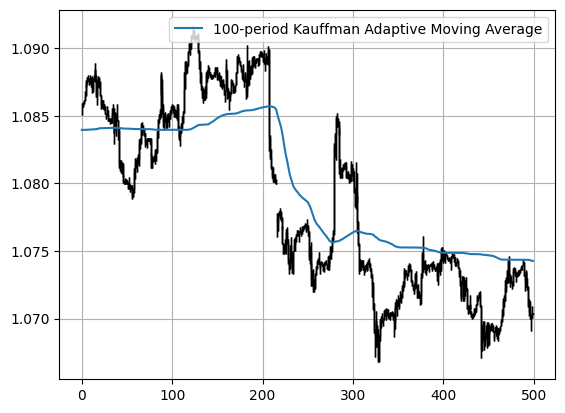

In [ ]:
ohlc_plot_bars(my_data1, 500)
plt.plot(my_data2[-500:,9], label = '100-period Kauffman Adaptive Moving Average')
plt.legend()


KAMA, or Kaufman's Adaptive Moving Average, is a technical analysis indicator designed to account for market noise and volatility. It was developed by Perry J. Kaufman and is known for its ability to adapt to changing market conditions. Unlike traditional moving averages, KAMA adjusts its speed based on the volatility of the market, becoming more sensitive during trends and less sensitive during sideways or choppy markets.

### Uses of KAMA

1. **Trend Identification:**
   - **Bullish Trend:** When the price is above the KAMA line, it indicates a bullish trend.
   - **Bearish Trend:** When the price is below the KAMA line, it indicates a bearish trend.

2. **Entry and Exit Signals:**
   - **Buy Signal:** When the price crosses above the KAMA line, it may signal a buying opportunity.
   - **Sell Signal:** When the price crosses below the KAMA line, it may signal a selling opportunity.

3. **Noise Filtering:**
   - KAMA filters out market noise and short-term fluctuations, allowing traders to focus on the underlying trend.

4. **Volatility Adjustment:**
   - KAMA adjusts its sensitivity based on market volatility. In highly volatile markets, it becomes smoother, while in less volatile markets, it becomes more sensitive.

### How KAMA Works

The KAMA calculation involves several steps:

1. **Efficiency Ratio (ER):**
   - ER measures the efficiency of price movement. It is calculated by dividing the absolute price change over a specified period by the sum of the absolute price changes of each bar within that period.
   - Formula: \( ER = \frac{\text{Price Change over N periods}}{\text{Sum of absolute Price Changes for each bar over N periods}} \)

2. **Smoothing Constant (SC):**
   - SC is derived from the ER and determines the weighting of the current price. It is scaled to a range between a minimum (slowest) and maximum (fastest) smoothing constant.
   - Formula: \( SC = (ER \times (\text{Fast SC} - \text{Slow SC}) + \text{Slow SC})^2 \)
   - Typical values are 2 / (N+1) for fast SC (e.g., 2 / (2+1) for 2 periods) and 2 / (N+1) for slow SC (e.g., 2 / (30+1) for 30 periods).

3. **KAMA Calculation:**
   - The KAMA value is updated iteratively using the previous KAMA value and the current price weighted by the smoothing constant.
   - Formula: \( KAMA_{t} = KAMA_{t-1} + SC \times (Price_t - KAMA_{t-1}) \)

### Example Code Explanation

Here's the provided KAMA function code with explanations:

```python
import numpy as np

def kama(Data, what, where, lookback):
    # Adding columns for intermediate calculations
    Data = adder(Data, 10)
    
    # Calculate the absolute price change from the previous period
    for i in range(len(Data)):
        Data[i, where] = abs(Data[i, what] - Data[i - 1, what])
    
    Data[0, where] = 0  # Initialize the first value to 0
    
    # Sum of lookbacks (volatility measure)
    for i in range(len(Data)):
        Data[i, where + 1] = Data[i - lookback + 1:i + 1, where].sum()
    
    # Calculate the price change over the lookback period
    for i in range(len(Data)):
        Data[i, where + 2] = abs(Data[i, what] - Data[i - lookback, what])
    
    Data = Data[lookback + 1:, ]  # Remove initial periods to avoid NaN values
    
    # Efficiency Ratio (ER)
    Data[:, where + 3] = Data[:, where + 2] / Data[:, where + 1]
    
    # Calculate the smoothing constant (SC)
    for i in range(len(Data)):
        Data[i, where + 4] = np.square(Data[i, where + 3] * 0.6666666666666666667)
    
    # Calculate the KAMA value
    for i in range(len(Data)):
        Data[i, where + 5] = Data[i - 1, where + 5] + (Data[i, where + 4] * (Data[i, what] - Data[i - 1, where + 5]))
        Data[11, where + 5] = 0  # Initialize first value of KAMA to 0
    
    # Remove intermediate columns used for calculation
    Data = deleter(Data, where, 5)
    Data = jump(Data, lookback * 2)
    
    return Data
```

### Function Explanation

1. **adder(Data, 10):**
   - Adds 10 columns to the Data array for intermediate calculations.

2. **Absolute Price Change Calculation:**
   - Calculates the absolute price change from the previous period for the entire dataset.

3. **Sum of Lookbacks:**
   - Sums the absolute price changes over the lookback period to measure volatility.

4. **Price Change Over Lookback Period:**
   - Calculates the absolute price change over the entire lookback period.

5. **Efficiency Ratio (ER):**
   - ER is calculated as the ratio of the lookback period price change to the sum of absolute price changes.

6. **Smoothing Constant (SC):**
   - SC is calculated based on the ER.

7. **KAMA Calculation:**
   - KAMA is updated iteratively using the previous KAMA value and the current price weighted by the smoothing constant.

8. **Remove Intermediate Columns:**
   - Deletes the intermediate columns used for calculations and retains the final KAMA values.

9. **Jump Function:**
   - The `jump` function is likely used to skip initial rows to avoid NaN or unstable initial values.

### Visualization
The function `ohlc_plot_bars` is used to visualize the OHLC data along with the calculated KAMA.

```python
ohlc_plot_bars(my_data, 500)
plt.plot(my_data[-500:, 4], label='100-period Adaptive Moving Average')
plt.legend()
plt.show()
```

This will plot the OHLC data along with the 100-period Adaptive Moving Average, providing a clear visual representation of the KAMA indicator in action.

### Comprehensive Tutorial: Implementing and Understanding KAMA (Kaufman's Adaptive Moving Average)

This tutorial will guide you through the process of implementing the KAMA (Kaufman's Adaptive Moving Average) using Python. We'll break down each part of the provided code, explain its purpose, and demonstrate how it all fits together to create a functional trading indicator.

#### Base Parameters

```python
# Base Parameters
assets = asset_list('FX') 

# Trading Parameters   
horizon = 'H1'
pair    = 0

# Mass Imports 
my_data = mass_import(pair, horizon)
```

**Explanation:**
- `assets = asset_list('FX')`: This function retrieves a list of assets from the Foreign Exchange (FX) market.
- `horizon = 'H1'`: This sets the trading time frame to hourly data.
- `pair = 0`: This specifies the asset pair to be used (in this case, the first asset in the list).
- `my_data = mass_import(pair, horizon)`: This imports the historical data for the specified asset pair and time frame.

#### Indicator Parameters

```python
# Indicator Parameters
lookback = 100
```

**Explanation:**
- `lookback = 100`: This sets the lookback period for the KAMA calculation, determining the number of periods over which the indicator will be calculated.

#### KAMA Function

```python
def kama(Data, what, where, lookback):
    
    Data = adder(Data, 10)
    
    # lookback from previous period
    for i in range(len(Data)):
        Data[i, where] = abs(Data[i, what] - Data[i - 1, what])
    
    Data[0, where] = 0
    
    # Sum of lookbacks
    for i in range(len(Data)):
        Data[i, where + 1] = (Data[i - lookback + 1:i + 1, where].sum())   
        
    # Volatility    
    for i in range(len(Data)):
        Data[i, where + 2] = abs(Data[i, what] - Data[i - lookback, what])
        
    Data = Data[lookback + 1:, ]
    
    # Efficiency Ratio
    Data[:, where + 3] = Data[:, where + 2] / Data[:, where + 1]
    
    for i in range(len(Data)):
        Data[i, where + 4] = np.square(Data[i, where + 3] * 0.6666666666666666667)
        
    for i in range(len(Data)):
        Data[i, where + 5] = Data[i - 1, where + 5] + (Data[i, where + 4] * (Data[i, what] - Data[i - 1, where + 5]))
        Data[11, where + 5] = 0
        
    Data = deleter(Data, where, 5)
    Data = jump(Data, lookback * 2)
    
    return Data
```

**Explanation:**
- `def kama(Data, what, where, lookback)`: This function calculates the KAMA indicator.
- `Data = adder(Data, 10)`: Adds 10 additional columns to the data array to store intermediate calculation results.
- `for i in range(len(Data))`: Loops through each row of the data array.
  - `Data[i, where] = abs(Data[i, what] - Data[i - 1, what])`: Calculates the absolute difference between the current and previous values.
  - `Data[0, where] = 0`: Initializes the first value to 0 to avoid referencing an out-of-bounds index.
  - `Data[i, where + 1] = (Data[i - lookback + 1:i + 1, where].sum())`: Sums the lookback periods.
  - `Data[i, where + 2] = abs(Data[i, what] - Data[i - lookback, what])`: Calculates volatility.
  - `Data = Data[lookback + 1:, ]`: Trims the data array to remove initial rows with incomplete calculations.
  - `Data[:, where + 3] = Data[:, where + 2] / Data[:, where + 1]`: Calculates the efficiency ratio.
  - `Data[i, where + 4] = np.square(Data[i, where + 3] * 0.6666666666666666667)`: Squares the efficiency ratio scaled by a constant.
  - `Data[i, where + 5] = Data[i - 1, where + 5] + (Data[i, where + 4] * (Data[i, what] - Data[i - 1, where + 5]))`: Calculates the KAMA.
  - `Data[11, where + 5] = 0`: Initializes a specific value to 0 to avoid referencing an out-of-bounds index.
- `Data = deleter(Data, where, 5)`: Deletes unnecessary columns.
- `Data = jump(Data, lookback * 2)`: Trims the data array further to skip initial rows.
- `return Data`: Returns the modified data array with the KAMA calculation.

#### Applying the KAMA Function and Plotting the Results

```python
my_data = kama(my_data, 3, 4, lookback)

ohlc_plot_bars(my_data, 500)
plt.plot(my_data[-500:, 4], label = '100-period Adaptive Moving Average')
plt.legend()
```

**Explanation:**
- `my_data = kama(my_data, 3, 4, lookback)`: Applies the KAMA function to the historical data, specifying the input column (3), the output column (4), and the lookback period.
- `ohlc_plot_bars(my_data, 500)`: Plots the last 500 data points as OHLC (Open, High, Low, Close) bars.
- `plt.plot(my_data[-500:, 4], label = '100-period Adaptive Moving Average')`: Plots the KAMA values for the last 500 data points.
- `plt.legend()`: Adds a legend to the plot.

### Conclusion

This tutorial has explained each part of the provided code, detailing its purpose and how it fits into the overall implementation of the KAMA indicator. By following these steps, you can apply the KAMA indicator to your own financial data and visualize the results to aid in your trading decisions.